## KNN
邻近算法，或者说K最近邻(kNN，k-NearestNeighbor)分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是k个最近的邻居的意思，说的是每个样本都可以用它最接近的k个邻居来代表。

kNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 kNN方法在类别决策时，只与极少量的相邻样本有关。由于kNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，kNN方法较其他方法更为适合。

下图中，绿色圆要被决定赋予哪个类，是红色三角形还是蓝色四方形？如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类，如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。

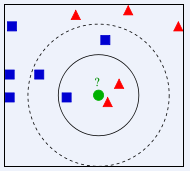

　KNN（K-Nearest Neighbor）工作原理：存在一个样本数据集合，也称为训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据与所属分类对应的关系。输入没有标签的数据后，将新数据中的每个特征与样本集中数据对应的特征进行比较，提取出样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k近邻算法中k的出处，通常k是不大于20的整数。最后选择k个最相似数据中出现次数最多的分类作为新数据的分类。

## 案例
根据fight和kiss的数目，使用knn对电影进行分类。


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

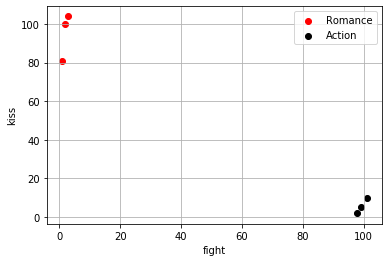

In [4]:
from sklearn import neighbors  # 导入KNN功能模块
import warnings
warnings.filterwarnings('ignore')
# 不发出警告

data = pd.DataFrame({
    'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
    'fight':[3,2,1,101,99,98],
    'kiss':[104,100,81,10,5,2],
    'type':['Romance','Romance','Romance','Action','Action','Action'],
})



plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type']=='Romance']['kiss'],color='r',marker='o',label='Romance' )
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type']=='Action']['kiss'],color='k',marker='o',label='Action' )
plt.grid()
plt.legend()
plt.ylabel('kiss')
plt.xlabel('fight')

knn = neighbors.KNeighborsClassifier()
knn.fit(data[['fight','kiss']],data['type'])

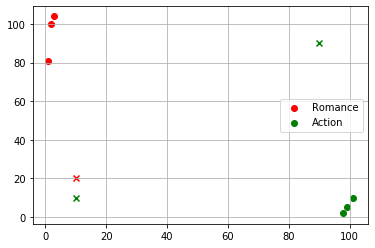

In [36]:
#随机生成一些数据进行预测
# data2 = pd.DataFrame(np.random.rand(100,2)*100,columns=['fight','kiss'])
data2 = pd.DataFrame([[10,10],[90,90],[10, 20]],columns=['fight','kiss'])
data2['typetest'] = knn.predict(data2)
plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type']=='Romance']['kiss'],color='r',marker='o',label='Romance' )
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type']=='Action']['kiss'],color='g',marker='o',label='Action' )
plt.grid()
plt.legend()

plt.scatter(data2[data2['typetest'] == 'Romance']['fight'],data2[data2['typetest']=='Romance']['kiss'],color='r',marker='x',label='Romance' )
plt.scatter(data2[data2['typetest'] == 'Action']['fight'],data2[data2['typetest']=='Action']['kiss'],color='g',marker='x',label='Action' )

## 决策树
决策树(Decision Tree）是在已知各种情况发生概率的基础上，通过构成决策树来求取净现值的期望值大于等于零的概率，评价项目风险，判断其可行性的决策分析方法，是直观运用概率分析的一种图解法。由于这种决策分支画成图形很像一棵树的枝干，故称决策树。在机器学习中，决策树是一个预测模型，他代表的是对象属性与对象值之间的一种映射关系。

决策树是一种十分常用的分类方法。他是一种监管学习，所谓监管学习就是给定一堆样本，每个样本都有一组属性和一个类别，这些类别是事先确定的，那么通过学习得到一个分类器，这个分类器能够对新出现的对象给出正确的分类。这样的机器学习就被称之为监督学习。

优点：

决策树易于理解和实现，人们在在学习过程中不需要使用者了解很多的背景知识，这同时是它的能够直接体现数据的特点，只要通过解释后都有能力去理解决策树所表达的意义。

对于决策树，数据的准备往往是简单或者是不必要的，而且能够同时处理数据型和常规型属性，在相对短的时间内能够对大型数据源做出可行且效果良好的结果。

易于通过静态测试来对模型进行评测，可以测定模型可信度；如果给定一个观察的模型，那么根据所产生的决策树很容易推出相应的逻辑表达式。

缺点：

1)对连续性的字段比较难预测。

2)对有时间顺序的数据，需要很多预处理的工作。

3)当类别太多时，错误可能就会增加的比较快。

4)一般的算法分类的时候，只是根据一个字段来分类。

sklearn官方关于决策树的文档：https://scikit-learn.org/stable/modules/tree.html

## 随机森林
在机器学习中，随机森林是一个包含多个决策树的分类器， 并且其输出的类别是由个别树输出的类别的众数而定。 Leo Breiman和Adele Cutler发展出推论出随机森林的算法。 而 "Random Forests" 是他们的商标。 这个术语是1995年由贝尔实验室的Tin Kam Ho所提出的随机决策森林（random decision forests）而来的。这个方法则是结合 Breimans 的 "Bootstrap aggregating" 想法和 Ho 的"random subspace method"以建造决策树的集合。


随机森林顾名思义，是用随机的方式建立一个森林，森林里面有很多的决策树组成，随机森林的每一棵决策树之间是没有关联的。在得到森林之后，当有一个新的输入样本进入的时候，就让森林中的每一棵决策树分别进行一下判断，看看这个样本应该属于哪一类（对于分类算法），然后看看哪一类被选择最多，就预测这个样本为那一类。

一、优点：

1、对于大部分的数据，它的分类效果比较好。

2、能处理高维特征，不容易产生过拟合，模型训练速度比较快，特别是对于大数据而言。

3、在决定类别时，它可以评估变数的重要性。

4、对数据集的适应能力强：既能处理离散型数据，也能处理连续型数据，数据集无需规范化。

二、缺点：

1、对少量数据集和低维数据集的分类不一定可以得到很好的效果。

2、 计算速度比单个的决策树慢。

3、 当我们需要推断超出范围的独立变量或非独立变量，随机森林做得并不好。

一个小例子：

In [38]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np 
from sklearn.datasets import load_iris 
iris=load_iris()


In [41]:
#print iris#iris的４个属性是：萼片宽度　萼片长度　花瓣宽度　花瓣长度　标签是花的种类：setosa versicolour virginica  
print (iris['target'].shape)
rf=RandomForestRegressor()#这里使用了默认的参数设置  
rf.fit(iris.data[:150],iris.target[:150])#进行模型的训练  
#随机挑选两个预测不相同的样本  
instance=iris.data[[100,109]]  
print (instance)
print( 'instance 0 prediction',rf.predict([instance[0]]) )
print( 'instance 1 prediction',rf.predict([instance[1]]) )
print (iris.target[100],iris.target[109]  )

(150,)
[[6.3 3.3 6.  2.5]
 [7.2 3.6 6.1 2.5]]
instance 0 prediction [2.]
instance 1 prediction [2.]
2 2
